# import and create dataframe

In [1]:
import pandas as pd
fish = pd.read_csv('ac_fish.csv')
insects = pd.read_csv('ac_insects.csv')

In [2]:
# the months and times active columns are confusing and can be displayed in a more efficient way.
fish_months = fish.iloc[:,8:20]

# clean month/times data

In [3]:
# rename the columns
fish_months.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July','Aug','Sep','Oct','Nov','Dec']




In [4]:
active_months = []
for i in range(len(fish_months)):
# iterate through the amount of rows in the fish_months dataframe
    months = list(fish_months.columns[(fish_months.notna()).iloc[i]])
    # return the column labels according to the condition that the values are not null, 
    # iterate through each row iloc[i]
    active_months.append(months)

fishy_months = pd.DataFrame(active_months)
fishy_months.fillna(value=pd.np.nan, inplace=True)
fishy_months.columns = ['0','1','2','3','4','5','6','7','8','9','10','11']

In [5]:
first_month = fishy_months.iloc[:,0]
date_range = pd.DataFrame(first_month)

In [6]:
all_last_months = []
for i in range(len(fishy_months)):
    index = int(pd.Series(fishy_months.iloc[i,:]).last_valid_index())
    last_month = fishy_months.iloc[i, index]
    all_last_months.append(last_month)


In [7]:
date_range['last'] = all_last_months


In [8]:
times = fish_months.fillna(method='bfill', axis=1).iloc[:, 0]
date_range['time'] = times

In [9]:
date_range.columns = ['first','last','time']

# count fish occurrence by date range

In [10]:
#date_range.groupby(['first','last']).size().reset_index(name='count')

In [11]:
fish = fish[['Name', 'Sell', 'Where/How', 'Total Catches to Unlock', 'Spawn Rates']]


In [12]:
fish = pd.merge(fish, date_range, left_index=True,right_index=True)

In [26]:
import plotly.express as px
fig = px.histogram(fish, x="Sell", nbins=50)
#fig.show()

In [19]:
no_months = list(fish_months.apply(lambda x: x.count(), axis=1))
fish['months_active'] = no_months

In [25]:
import plotly.express as px
fig = px.scatter(fish, x="Sell", y="months_active")
fig.show()

In [88]:
pd.set_option('display.max_rows', None)
fish['time']

# 4 am to 9 pm is 12 hours
# 9 pm to 4 am is 7 hours
# 9 am to 4 pm is 7 hours
# 9 AM – 4 PM; 9 PM – 4 AM is 14 hours


fouram_ninepm = '4 AM – 9 PM'
fourpm_nineam = '4 PM –\xa09 AM'
ninepm_fouram = '9 PM – 4 AM'
nineam_fourpm = '9 AM –\xa04 PM'
ninefourninefour = '9 AM – 4 PM; 9 PM – 4 AM'
allday = 'All day'




total_hours = []

for i in fish['time']:
    if i == '4 AM – 9 PM':
        total_hours.append(12)
    elif i == '9 PM – 4 AM' or i == '9 PM –\xa04 AM':
        total_hours.append(7)
    elif i == '4 PM –\xa09 AM':
        total_hours.append(17)
    elif i == '9 AM –\xa04 PM':
        total_hours.append(7)
    elif i == '9 AM –\xa04 PM; 9 PM – 4 AM':
        total_hours.append(14)
    elif i == 'All day':
        total_hours.append(24)
    else:
        total_hours.append('?')
fish['total_hours'] = total_hours       

In [107]:
location = {'Where/How':{'Sea':0, 'Sea (rainy days)': 0, 'Pier':0, 'River':1, 'River (clifftop)': 1, 'Pond':1, 'River (mouth)':1, }}
fish.replace(location, inplace=True)





In [113]:
46/80

# 57.5% of all fish are caught in the ocean.

0.575

In [110]:
import plotly.express as px
fig = px.scatter(fish, x="Sell", y="Where/How")
fig.show()

In [118]:
price = fish['Sell']

AttributeError: 'list' object has no attribute 'reshape'

In [126]:
import numpy as np
price = np.array(fish['Sell']).reshape(-1,1)
location = np.array(fish['Where/How']).reshape(-1,1)

In [128]:
# Instantiate a Logistic regression model
# Solver must be specified to avoid warning, see documentation for more information
# liblinear is recommended for small datasets
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
regr = LogisticRegression(C=1e5, solver='liblinear')

# Fit the model to the training set
regr.fit(price, location)
# Store the coefficients
coef = regr.coef_
interc = regr.intercept_

# Create the linear predictor
lin_pred = (price * coef + interc)

# Perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))

# Sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



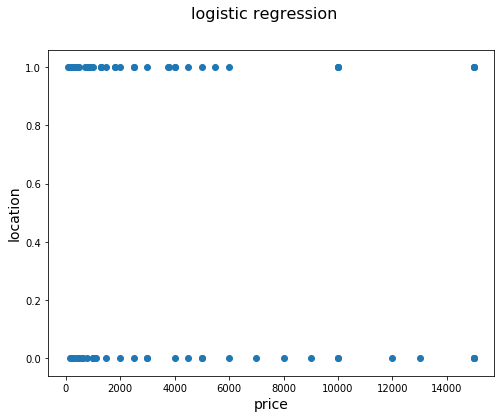

In [130]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(price, location)
plt.xlabel('price', fontsize=14)
plt.ylabel('location', fontsize=14)
plt.show()